# Python ja tekoäly: koodauksen perusteet

# Ryhmittely hierarkisella klusterointialgoritmilla

## Koulutus: 28.11.2019


In [1]:
# Let's use the usual Python libraries:
import pandas as pd              # for managing data frame
import numpy as np               # for performing data array calculations
import matplotlib.pyplot as plt  # for plotting

# For visualization, we use Matplotlib and Seaborn
from matplotlib.mlab import PCA  # for Principal Component analysis
import seaborn as sns            # for visualization

# Keinotekoisen datan generointiin soveltuva funktio:
from sklearn.datasets.samples_generator import make_blobs

# Kirjastoja, jotka tarjoavat kluterointialgortimeja
from sklearn.cluster import AgglomerativeClustering # Vaihtoehto 1: käytä scikit-learn -kirjastoa
from scipy.cluster.hierarchy import dendrogram, linkage # Vaihtoehto 2: käytä scipy.cluster.hierarchy -kirjastoa

# Ryhmittely eli klusterointi


Ryhmittelyalgoritmeilla pyritään löytämään merkityksellisiä ryhmiä datasta. Algoritmeilla on joku matemaattisesti määritely funktio, jota optimoidaan tai vain algoritminen kuvaus, jolla ryhmiä löydetään. Se, onko löydetyt ryhmät merkityksellisiä, jää ihmisen päätettäväksi. Klusteroinnin ominaisuuksia voidaan kuitenkin mitata siinä mielessä ovatko ryhmien kuvaukset kompakteja ja ryhmät toisistaan eroavia. Mikään algorimi ei kuitenkaan voi itse päättää onko löydetty ryhmittely hyvä tai merkityksellinen.



Seuraavassa luomme keinotekoisen datajoukon, jonka tarkoituksena on toimia kontrolloituna esimerkkinä siitä, että datassa on toisistaan eroavia ryhmiä, joita voidaan algorimtmisesti etsiä. Käytämme tässä sklearn -kirjaston funktiota, jolla voi helposti luoda esimerkkiaineistoja.

In [2]:
# Seuraavaksi luodaan dataa, joka koostuu kolmesta ryhmästä (centers=3), kukin vektoreista sisältää
# kaksi mittausta (n_features=2):

# ALKUPERÄINEN: X_data, X_cluster_index = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X_data, X_cluster_index = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Voidaan tarkastella dataa ja klusteri-indeksejä eli sitä mihin ryhmään kukin datavektori kuuluu.
# Voit ajaa koodia ottamalla kommenttimerkin pois ja evaluoimalla solun:

# Datan dimensiot eli rivien määrän ja sarakkeiden määrän näkee seuraavalla komennolla:
# print(X_data.shape)

# Muuttuja X_data sisältää itse ryhmiteltävän datan
# Muuttuja X_cluster_index on indeksimuuttuja (0,1,2,...), joka kertoo mihin klusteriin mittausvektori kuuluu
# X_data
# X_cluster_index

# Voimme katsoa paljonko dataa on kussakin klusterissa luomalla histogrammin indekseistä:
# plt.hist(X_cluster_index)


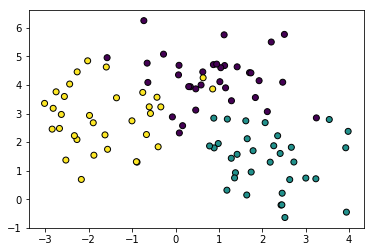

In [3]:
# Dataa kannattaa aina "katsoa" tai tutkia ennenkuin dataa analysoidaan algoritmien avulla.
# Piirretään 2-ulotteinen data ja katsotaan näkyykö siinä ryhmärakennetta.

plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=X_cluster_index, edgecolor='k')

Tarkastele ylläolevaa kuvaa. Näetkö datassa selkeitä ryhmiä? Miltä data vaikuttaa?

## Hierarkinen klusterointi

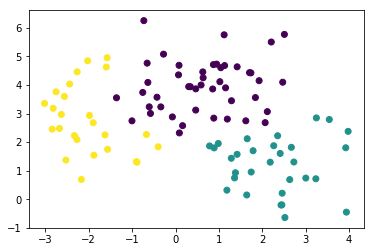

In [4]:
# Nyt ajetaan hierarkinen klusterointi-algoritmi keinotekoiselle
# datalle, jossa on siis kolme klusteria:

# Hierarkinen klusterointi tarvitsee linkage -parametrin, 
hier_clust = AgglomerativeClustering(linkage='average', n_clusters=3)
hier_clust.fit(X_data)

# Klusterit saadaan mallin attribuutista labels_:
klusteri_jasenyys = hier_clust.labels_

# Plottaa klusterit omilla väreillä:
plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=klusteri_jasenyys)

## Tehtävä h1: muuta klusterien määrää datassa

Toista ylläoleva analyysi muuttamalla algoritmin parametreja. Luo esimerkiksi 10 ryhmää vaihtamalla make_blobs funktion parametriä (centers=3). Aja algoritmi ja tulkitse tulosta. Mitä tapahtuu kun datassa on kolme klusteria ja algoritmi etsii datasta kymmentä klusteria?

## Tehtävä h2: muuta hierarkisen klusteroinnin linkkifunktiota

Hierarkinen klusterointi tarvitsee linkkifunktion (linkage-parametrin), joka vaikuttaa siihen miten klustereita yhdistetään toisiinsa. Tutustu erilaisiin linkage -funktioihin dokumentaatiossa: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html ja kokeile eri linkage -funktioiden vaikutusta klusterointiin.